# Gradient Descent with Applications to Linear Regression

For our test function we will use $f(x) = (x-2)^2 + 1$.

We demonstrate this iterative method with the function

$$
f(x) = (x-2)^2 + 1,
$$

with gradient

$$
\begin{align}
    \nabla f(x) &= \begin{bmatrix}
        2(x-2)
        \end{bmatrix}
    \end{align}
$$


---

In [1]:
using Plots

f(x) = (x-2)^2 + 1

f (generic function with 1 method)

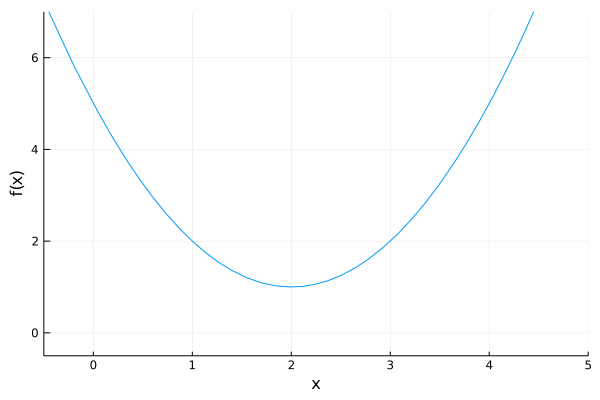

In [2]:
plot(f,
    xlims = (-.5, 5),
    xaxis = "x",
    ylims = (-.5, 7),
    yaxis = "f(x)",
    legend = false)

The plot clearly shows the global $\textit{minimizer}$ is attained at $x=2$.

---

Now an initial guess is made at $x_0 = 4.0$.

x_0 = 4.0
 


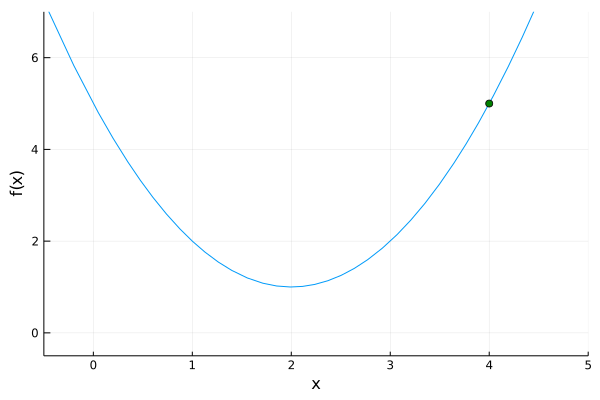

In [3]:
x_0 = 4.0

println("x_0 = $x_0")
println(" ")

scatter!([(x_0, f(x_0))],
        color = "green")

In [4]:
function F(x, ϵ)
    return(f(x+ϵ)-f(x))/ϵ
end

F (generic function with 1 method)

In [5]:
function gradient_descent(f, x_0, α, iteration)
    points = [(x_0, f(x_0))]
    for _ = 1:iteration
        x_0 = x_0 - α * F(x_0, 0.001)
        push!(points, (x_0, f(x_0)))
    end
    return points
end

gradient_descent (generic function with 1 method)

In [6]:
stepfunc = gradient_descent(f, 9.0, 0.12, 10)

11-element Array{Tuple{Float64,Float64},1}:
 (9.0, 50.0)                             
 (7.319880000000808, 29.301123214408594) 
 (6.042988800000245, 17.345758436927422) 
 (5.072551488000073, 10.440572646411463) 
 (4.3350191308798145, 6.452314341574724) 
 (3.774494539468499, 4.14883087060352)   
 (3.3484958499961124, 2.8184410574567376)
 (3.0247368459970367, 2.0500856035439545)
 (2.7786800029577883, 1.6063425470063413)
 (2.5916768022479584, 1.3500814383183697)
 (2.4495543697084674, 1.2020991313239775)

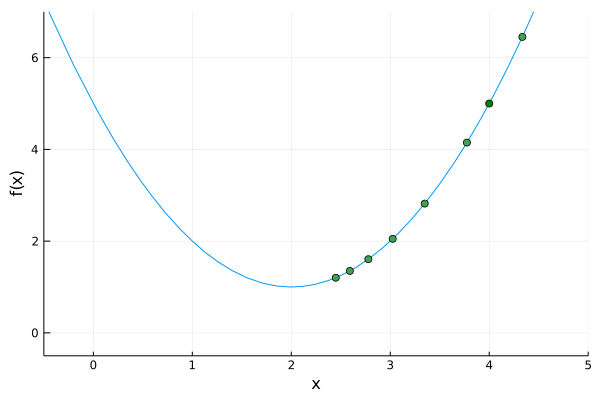

In [7]:
scatter!(stepfunc)

In [8]:
step_func = gradient_descent(f, 5.0, 0.15, 5)

6-element Array{Tuple{Float64,Float64},1}:
 (5.0, 10.0)                             
 (4.099849999999812, 5.40937002249921)   
 (3.4697449999997865, 3.1601503650243723)
 (3.0286714999998754, 2.058165054911994) 
 (2.7199200499999643, 1.5182848783919511)
 (2.503794035000013, 1.2538084297015946) 

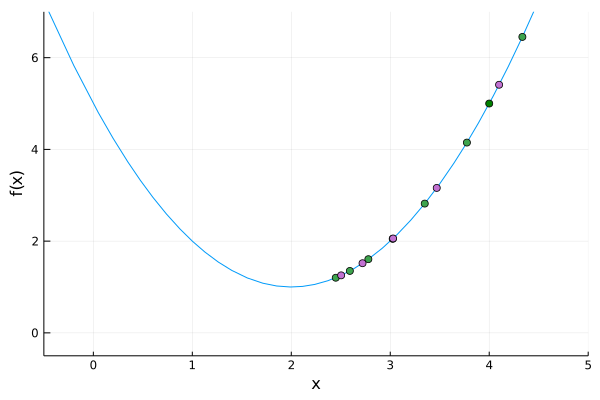

In [9]:
scatter!(step_func)

---
# Applications to linear regression

In [16]:
using Random
using RDatasets
using CSV # uding DataFrames (soon)
using DataFrames

In [17]:
data = CSV.read("Advertising.csv", DataFrame)

,Column1,TV,radio,newspaper,sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2
7,7,57.5,32.8,23.5,11.8
8,8,120.2,19.6,11.6,13.2
9,9,8.6,2.1,1.0,4.8


In [19]:
x_data = data.radio
y_data = data.sales

data_tuples = [x for x in zip(x_data, y_data)]

200-element Array{Tuple{Float64,Float64},1}:
 (37.8, 22.1)
 (39.3, 10.4)
 (45.9, 9.3) 
 (41.3, 18.5)
 (10.8, 12.9)
 (48.9, 7.2) 
 (32.8, 11.8)
 (19.6, 13.2)
 (2.1, 4.8)  
 (2.6, 10.6) 
 (5.8, 8.6)  
 (24.0, 17.4)
 (35.1, 9.2) 
 ⋮           
 (13.9, 15.9)
 (12.1, 6.7) 
 (41.1, 10.8)
 (10.8, 9.9) 
 (4.1, 5.9)  
 (42.0, 19.6)
 (35.6, 17.3)
 (3.7, 7.6)  
 (4.9, 9.7)  
 (9.3, 12.8) 
 (42.0, 25.5)
 (8.6, 13.4) 

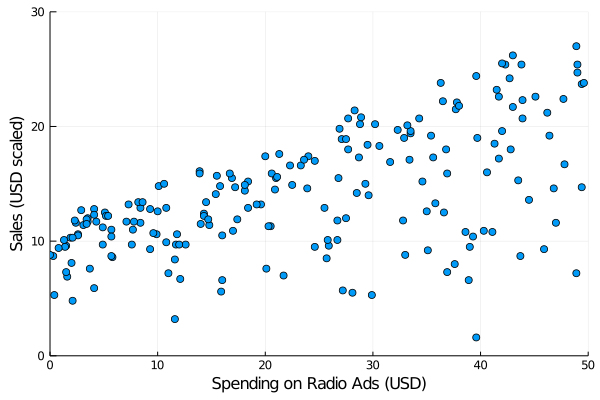

In [24]:
scatter(data_tuples,
        xlim = (0, 50),
        ylim = (0, 30),
        xaxis = "Spending on Radio Ads (USD)",
        yaxis = "Sales (USD scaled)",
        legend = false)



In [46]:
function batch_gradient_descent(x_data, y_data, w, b, α)
    N = length(x_data)
    
    w = w - (-2/N)* α * sum([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    b = b - (-2/N)* α *sum([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w,b
end

function batch_train(x_data, y_data, w, b , α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i == 1
            println("Epoch", i, "with cost: ", C(w, b))
        end
        
        if i == 100
            println("Epoch", i, "with cost: ", C(w, b))
        end
        if i == 1000
            println("Epoch", i, "with cost: ", C(w, b))
        end
        if i == 10000
            println("Epoch", i, "with cost: ", C(w, b))
        end
        if i == 100000
            println("Epoch", i, "with cost: ", C(w, b))
        end
    end
    
    return w, b
end

batch_train (generic function with 1 method)

Epoch1with cost: 218.25564494218725
Epoch100with cost: 51.39115357397025
Epoch1000with cost: 42.73263626181141
Epoch10000with cost: 40.304976159128536


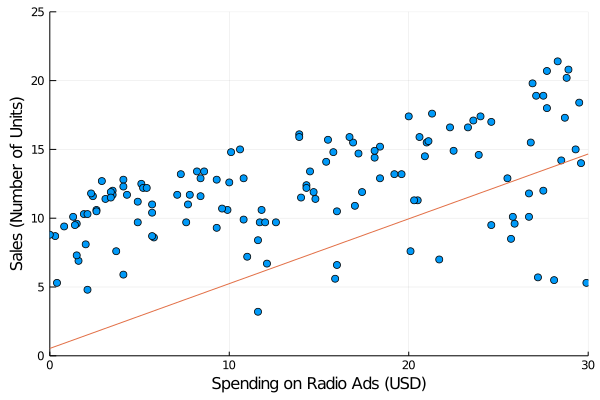

In [51]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 10000)

scatter(data_tuples,
        xlim = (0, 30),
        ylim = (0, 25),
        xaxis = "Spending on Radio Ads (USD)",
        yaxis = "Sales (Number of Units)",
        legend = false)

plot!(x->  x*w + b, xlim = (0,30),
        ylim = (0, 25),
        legend = false)

Epoch1with cost: 218.25564494218725
Epoch100with cost: 51.39115357397025
Epoch1000with cost: 42.73263626181141
Epoch10000with cost: 40.304976159128536
Epoch100000with cost: 25.965386636702146


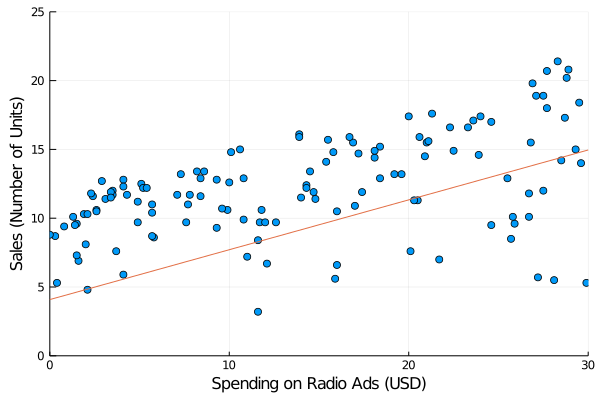

In [52]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 100000)

scatter(data_tuples,
        xlim = (0, 30),
        ylim = (0, 25),
        xaxis = "Spending on Radio Ads (USD)",
        yaxis = "Sales (Number of Units)",
        legend = false)

plot!(x->  x*w + b, xlim = (0,30),
        ylim = (0, 25),
        legend = false)

Epoch1with cost: 218.25564494218725
Epoch100with cost: 51.39115357397025
Epoch1000with cost: 42.73263626181141
Epoch10000with cost: 40.304976159128536
Epoch100000with cost: 25.965386636702146


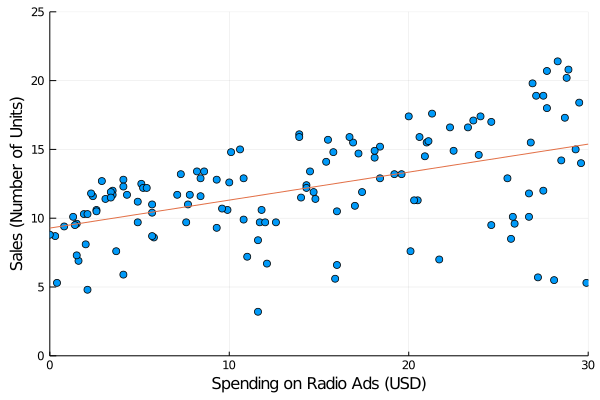

In [54]:
w, b = batch_train(x_data, y_data, 0.0, 0.0, 0.00001, 1000000)

scatter(data_tuples,
        xlim = (0, 30),
        ylim = (0, 25),
        xaxis = "Spending on Radio Ads (USD)",
        yaxis = "Sales (Number of Units)",
        legend = false)

plot!(x->  x*w + b, xlim = (0,30),
        ylim = (0, 25),
        legend = false)